In [3]:
import numpy as np # We'll be storing our data as numpy arrays
import os # For handling directories
from PIL import Image # For handling the images
import matplotlib.pyplot as plt
import zipfile
import matplotlib.image as mpimg # Plotting

In [12]:
with zipfile.ZipFile("dataset.zip", "r") as zip_ref:
    zip_ref.extractall("dataset")

lookup = dict()
reverselookup = dict()
count = 0

for j in os.listdir('dataset/leapGestRecog/leapGestRecog/00'):
    if not j.startswith('.'):
        lookup[j] = count
        reverselookup[count] = j
        count = count + 1
lookup

{'01_palm': 0,
 '02_l': 1,
 '03_fist': 2,
 '04_fist_moved': 3,
 '05_thumb': 4,
 '06_index': 5,
 '07_ok': 6,
 '08_palm_moved': 7,
 '09_c': 8,
 '10_down': 9}

In [14]:
%%time
dataset_path = 'dataset.zip'

lookup = dict()
reverselookup = dict()
count = 0

# Unzip the dataset.zip file
with zipfile.ZipFile(dataset_path, "r") as zip_ref:
    zip_ref.extractall("../input/")

# Iterate over the folders inside the leapGestRecog directory
for j in os.listdir('../input/leapGestRecog/leapGestRecog/00'):
    if not j.startswith('.'):
        lookup[j] = count
        reverselookup[count] = j
        count = count + 1

lookup



CPU times: total: 34.9 s
Wall time: 49.5 s


{'01_palm': 0,
 '02_l': 1,
 '03_fist': 2,
 '04_fist_moved': 3,
 '05_thumb': 4,
 '06_index': 5,
 '07_ok': 6,
 '08_palm_moved': 7,
 '09_c': 8,
 '10_down': 9}

In [15]:
x_data = []
y_data = []
datacount = 0 # We'll use this to tally how many images are in our dataset
for i in range(0, 10): # Loop over the ten top-level folders
    for j in os.listdir('../input/leapgestrecog/leapGestRecog/0' + str(i) + '/'):
        if not j.startswith('.'): # Again avoid hidden folders
            count = 0 # To tally images of a given gesture
            for k in os.listdir('../input/leapgestrecog/leapGestRecog/0' + 
                                str(i) + '/' + j + '/'):
                                # Loop over the images
                img = Image.open('../input/leapgestrecog/leapGestRecog/0' + 
                                 str(i) + '/' + j + '/' + k).convert('L')
                                # Read in and convert to greyscale
                img = img.resize((320, 120))
                arr = np.array(img)
                x_data.append(arr) 
                count = count + 1
            y_values = np.full((count, 1), lookup[j]) 
            y_data.append(y_values)
            datacount = datacount + count
x_data = np.array(x_data, dtype = 'float32')
y_data = np.array(y_data)
y_data = y_data.reshape(datacount, 1)

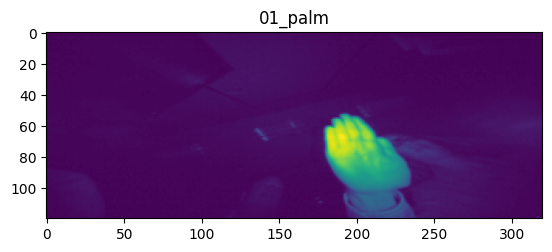

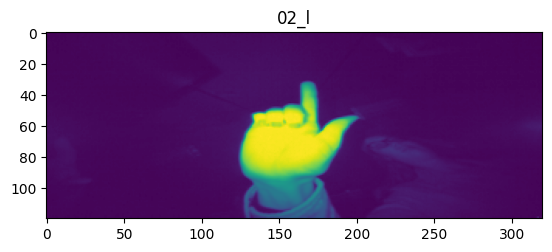

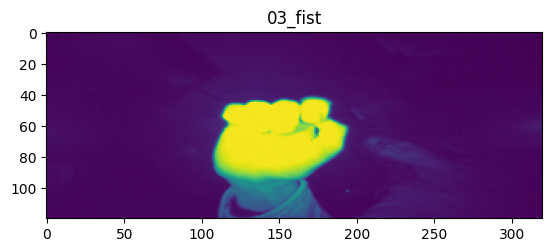

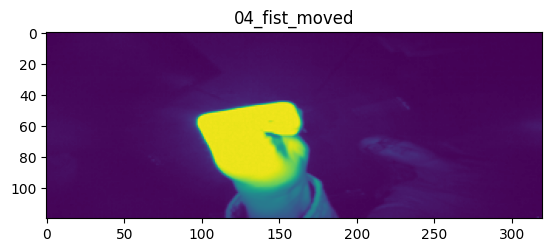

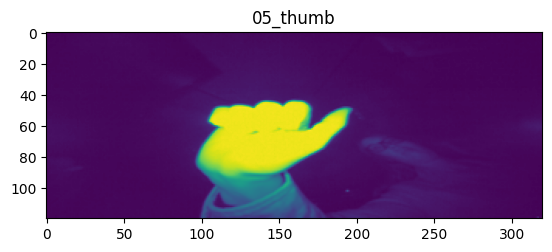

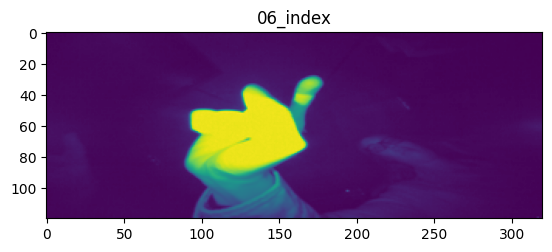

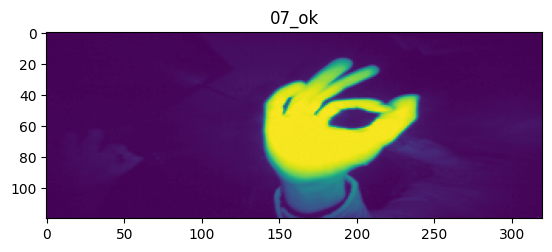

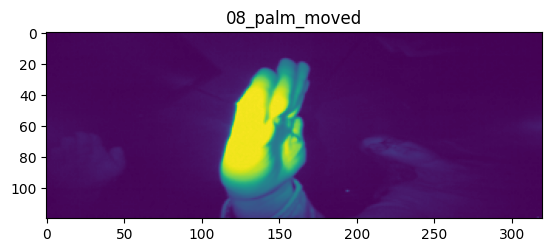

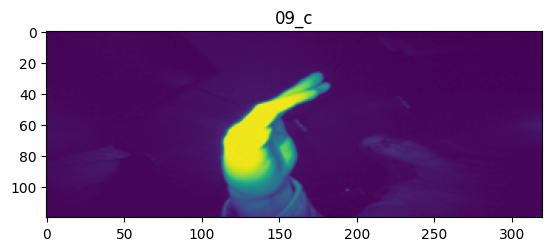

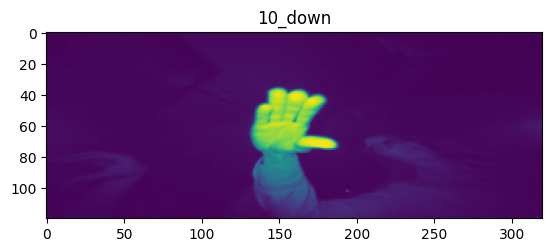

In [16]:
from random import randint
for i in range(0, 10):
    plt.imshow(x_data[i*200 , :, :])
    plt.title(reverselookup[y_data[i*200 ,0]])
    plt.show()

In [17]:
import keras
from keras.utils import to_categorical
y_data = to_categorical(y_data)

In [18]:
x_data = x_data.reshape((datacount, 120, 320, 1))
x_data /= 255

In [19]:
from sklearn.model_selection import train_test_split
x_train,x_further,y_train,y_further = train_test_split(x_data,y_data,test_size = 0.2)
x_validate,x_test,y_validate,y_test = train_test_split(x_further,y_further,test_size = 0.5)

In [20]:
from keras import layers
from keras import models

In [21]:
model=models.Sequential()
model.add(layers.Conv2D(32, (5, 5), strides=(2, 2), activation='relu', input_shape=(120, 320,1))) 
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu')) 
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

In [22]:
model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
model.fit(x_train, y_train, epochs=5, batch_size=64, verbose=1, validation_data=(x_validate, y_validate))


Epoch 1/5


250/250 [==============================] - 68s 257ms/step - loss: 0.3308 - accuracy: 0.8940 - val_loss: 0.0077 - val_accuracy: 0.9980
Epoch 2/5
250/250 [==============================] - 60s 242ms/step - loss: 0.0212 - accuracy: 0.9953 - val_loss: 0.0039 - val_accuracy: 0.9990
Epoch 3/5
250/250 [==============================] - 61s 244ms/step - loss: 0.0084 - accuracy: 0.9978 - val_loss: 0.0026 - val_accuracy: 0.9990
Epoch 4/5
250/250 [==============================] - 61s 244ms/step - loss: 0.0012 - accuracy: 0.9996 - val_loss: 2.5264e-04 - val_accuracy: 1.0000
Epoch 5/5
250/250 [==============================] - 60s 241ms/step - loss: 3.8870e-06 - accuracy: 1.0000 - val_loss: 1.6858e-04 - val_accuracy: 1.0000


In [23]:
[loss, acc] = model.evaluate(x_test,y_test,verbose=1)
print("Accuracy:" + str(acc))

63/63 [==============================] - 3s 45ms/step - loss: 0.0011 - accuracy: 0.9990
Accuracy:0.9990000128746033


In [24]:
model.save_weights('gesture_model_weights.h5')
model.save("gesture_model.h5")

C:\Users\hp\anaconda3\envs\Prodigy\lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [25]:
import tensorflow as tf
from tensorflow import keras
from tensorflow import image
import numpy as np

In [26]:
model.save('gesture_recognition_model.h5')


In [27]:
from keras.models import load_model

loaded_model = load_model('gesture_recognition_model.h5')


In [28]:
from keras.preprocessing import image
import numpy as np

In [38]:
t_test = []

datacount = 0 # We'll use this to tally how many images are in our dataset
#folder_path = 'dataset/leapGestRecog/00/01_palm'
folder_path = 'dataset/test'

for filename in os.listdir(folder_path):
    if filename.endswith(".jpg") or filename.endswith(".png"):
       
        img_path = os.path.join(folder_path, filename)
        count = 0 # To tally images of a given gesture

        
        img = Image.open(img_path).convert('L')  # Convert to grayscale
        img = img.resize((320, 120))
        arr = np.array(img)
        t_test.append(arr)
        count = count + 1
        
    datacount = datacount + count
t_test = np.array(t_test, dtype = 'float32')

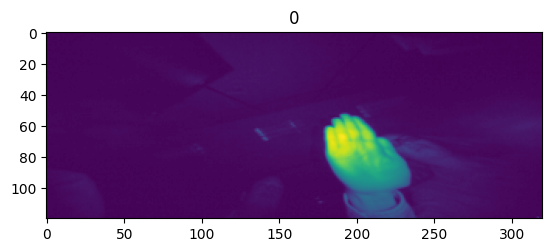

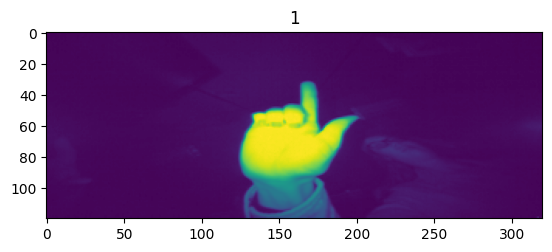

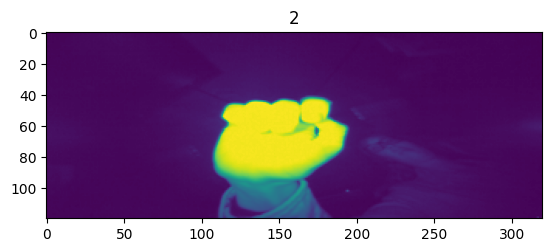

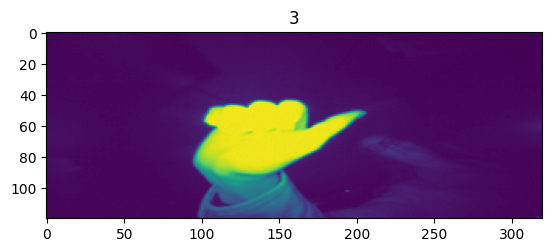

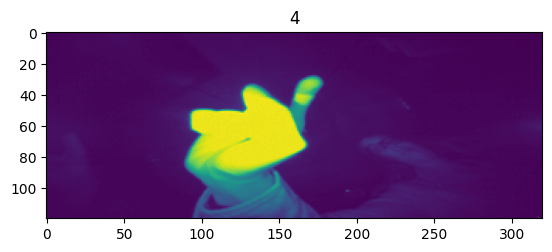

In [39]:
for i in range(0, 5):
    plt.imshow(t_test[i , :, :])
    plt.title(i)
    plt.show()

1/1 [==============================] - 0s 175ms/step


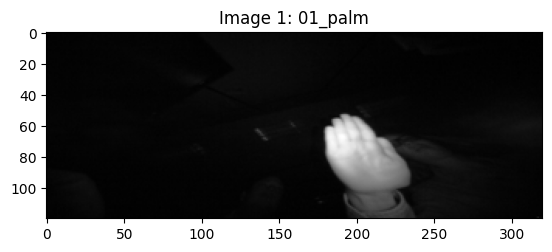

1/1 [==============================] - 0s 27ms/step


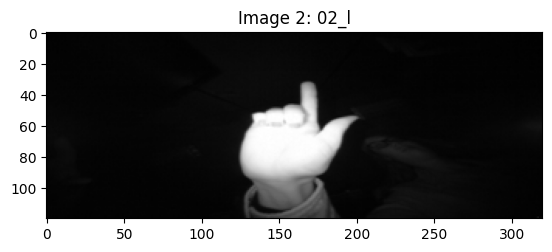

1/1 [==============================] - 0s 22ms/step


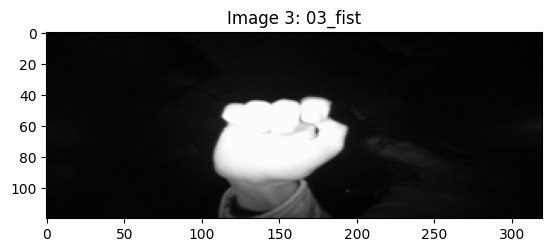

1/1 [==============================] - 0s 22ms/step


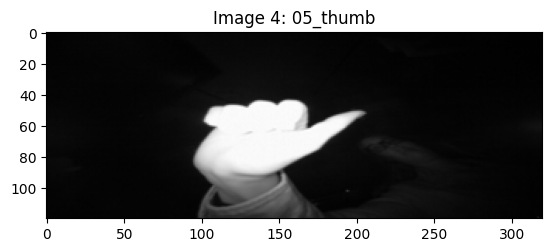

1/1 [==============================] - 0s 27ms/step


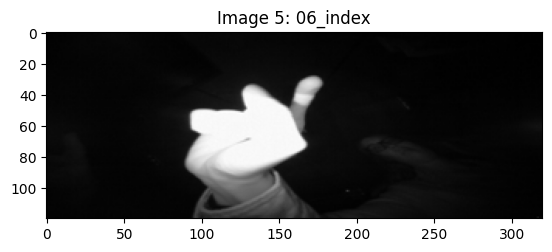

Predicted Gestures: ['01_palm', '02_l', '03_fist', '05_thumb', '06_index']


In [40]:
predicted_gestures = []

for i in range(t_test.shape[0]):
    img_show = t_test[i].reshape(120,320)  
    
    img2 = img_show.reshape(1, 120, 320, 1)  
    img2 /= 255.0  
    
    predictions = loaded_model.predict(img2)
 
    predicted_class = np.argmax(predictions)
    predicted_gesture = reverselookup[predicted_class]
    predicted_gestures.append(predicted_gesture)
    
    plt.imshow(img_show, cmap='gray') 
    
    plt.title(f"Image {i + 1}: {predicted_gesture}")
    plt.show()
print("Predicted Gestures:", predicted_gestures)

1/1 [==============================] - 0s 24ms/step
Predicted Gestures: ['01_palm', '02_l', '03_fist', '05_thumb', '06_index']


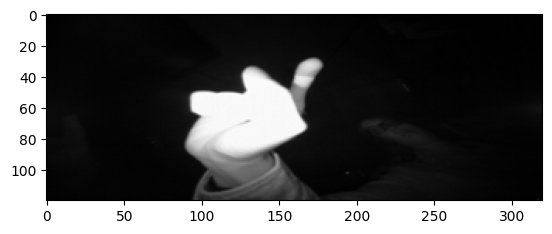

In [42]:
import matplotlib.pyplot as plt

 
folder_path = 'dataset/test'

 
predicted_gestures = []
 
for filename in os.listdir(folder_path):
    if filename.endswith(".jpg") or filename.endswith(".png"):
        
        img_path = os.path.join(folder_path, filename)

       
        img = Image.open(img_path).convert('L')  # Convert to grayscale
        img = img.resize((320, 120))
        arr = np.array(img)
        t_test = arr.reshape((1, 120, 320, 1))
        t_test = t_test / 255.0
        plt.imshow(arr, cmap='gray')

   
        predictions = loaded_model.predict(t_test)

 
        predicted_class = np.argmax(predictions)
        predicted_gesture = reverselookup[predicted_class]
        predicted_gestures.append(predicted_gesture)

print("Predicted Gestures:", predicted_gestures)

In [43]:
x_data.size, y_data.size, t_test.view

(768000000, 200000, <function ndarray.view>)